<a href="https://colab.research.google.com/github/prashanthakg6/ALA/blob/main/VectorsAndMatrices_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$${\color{yellow}{\text{Applied Linear Algebra: Vectors and Matrices}}}$$



---

Restart the session after executing the following cell

---

In [ ]:
!pip install gensim

In [ ]:
!pip install yfinance --quiet

---

Load essential libraries

---

In [ ]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
plt.style.use('dark_background')
%matplotlib inline
import sys  # system utilities
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
import nltk
import gensim.downloader
from nltk.tokenize import word_tokenize
import yfinance as yf
import seaborn as sns # plotting package

---

Mount Google Drive folder if running Google Colab

---

In [ ]:
## Mount Google drive folder if running in Colab
if('google.colab' in sys.modules): # sys.modules is a list
    from google.colab import drive
    drive.mount('/content/drive', force_remount = True)
    DIR = '/content/drive/MyDrive/Colab Notebooks/ALA/In-class-2025/CourseMAHE25'
    DATA_DIR = DIR+'/Data/'
else:
    DATA_DIR = 'Data/'

Mounted at /content/drive


---

**We will now use Pytorch to create tensors**

The patient data matrix:

![patient data matrix](https://1drv.ms/i/s!AjTcbXuSD3I3hsxIkL4V93-CGq8RkQ?embed=1&width=1000)

**Notation**:

Zeroth patient vector $\mathbf{x}^{(0)}= \begin{bmatrix}72\\120\\37.3\\104\\32.5\end{bmatrix}$ and zeroth feature (heart rate vector) $\mathbf{x}_0 = \begin{bmatrix}72\\85\\68\\90\\84\\78\end{bmatrix}.$

---



In [ ]:
## Create a patient data matrix as a constant tensor
X = torch.tensor([[72, 120, 37.3, 104, 32.5],
                  [85, 130, 37.0, 110, 14],
                  [68, 110, 38.5, 125, 34],
                  [90, 140, 38.0, 130, 26],
                  [84, 132, 38.3, 146, 30],
                  [78, 128, 37.2, 102, 12]])
print(X)
print(X.shape)
print(type(X))
print(X[0]) # this is patient-0 information which is a rank-1 tensor
print(X[0, :]) # patient-0 all features
print('------------')
print(X[0, 2]) # feature-2 of patient-0, temperature of patient-0
print(X[:, 2]) # feature-2 of all patients, temperature of all patients

tensor([[ 72.0000, 120.0000,  37.3000, 104.0000,  32.5000],
        [ 85.0000, 130.0000,  37.0000, 110.0000,  14.0000],
        [ 68.0000, 110.0000,  38.5000, 125.0000,  34.0000],
        [ 90.0000, 140.0000,  38.0000, 130.0000,  26.0000],
        [ 84.0000, 132.0000,  38.3000, 146.0000,  30.0000],
        [ 78.0000, 128.0000,  37.2000, 102.0000,  12.0000]])
torch.Size([6, 5])
<class 'torch.Tensor'>
tensor([ 72.0000, 120.0000,  37.3000, 104.0000,  32.5000])
tensor([ 72.0000, 120.0000,  37.3000, 104.0000,  32.5000])
------------
tensor(37.3000)
tensor([37.3000, 37.0000, 38.5000, 38.0000, 38.3000, 37.2000])


---

**Convert a PyTorch object into a numpy array**

---

In [ ]:
print(X.numpy())
print(type(X.numpy()))

---

**Addition and subtraction of vectors, scalar multiplication (apply operation componentwise)**

![vector addition](https://1drv.ms/i/c/37720f927b6ddc34/IQQ03G17kg9yIIA3NokBAAAAAZLAaAoWwhtn8Vk26NotALo?width=256)

![vector subtracton](https://1drv.ms/i/c/37720f927b6ddc34/IQQ03G17kg9yIIA3M4kBAAAAAU_n_mAEv006QFZm_sUj2Dc?width=256)

![vector multiplication](https://1drv.ms/i/c/37720f927b6ddc34/IQQ03G17kg9yIIA3NIkBAAAAAa_qL04bLT4kWoNeHcrR9LQ?width=256)

![vector geometry1](https://1drv.ms/i/c/37720f927b6ddc34/IQSGNMr5z3SSRry7LSKL7LybAcGYuzgw5smabV8-6DudXIs?width=230)

![vector geometry2](https://1drv.ms/i/c/37720f927b6ddc34/IQQ03G17kg9yIIA3WokBAAAAAQi8FPV9YCebl5WnyEKJ3vg?width=213&height=192)


---

In [ ]:
# Vector addition
print(X[1, :] + X[2, :])

# Vector subtraction
print(X[1, :] - X[2, :])

# Scalar-vector multiplication
print(X[:, 2])
print((9/5)*X[:, 2]+32) # 0peration not defined in pen & paper but in computation is referred to as
# broadcasting

# Average patient
x_avg = (1/6)*(X[0, :] + X[1, :] + X[2, :] + X[3, :] + X[4, :] + X[5, :])
x_avg = torch.mean(X, dim = 0) # dim = 0 means top-to-bottom or along dim-0

# Another broadcasting example
print(X)
print(x_avg)
print(X - x_avg)

---

Application of vector subtraction in natural language processing (NLP): download the word embedding model trained on Wikipedia articles.

---

In [ ]:
model = gensim.downloader.load('glove-wiki-gigaword-50')

[==================================================] 100.0% 66.0/66.0MB downloaded


---

Now we will see what embedding vector comes as a result of applying the model for the words *cricket* and *football*.

Next, we will do an *intuitive* subtraction of word embeddings as in

1. Cricket without Tendulkar
2. Football without Messi

Note that the embedding vectors have 50 components corresponding to the 50-dimensional embedding of model suggested by the name '**glove-wiki-gigaword-50**'

---

In [ ]:
# Cricket without Tendulkar
a = model['cricket'] - model['tendulkar']

# Football without Messi
b = model['football'] - model['messi']
print(a)
print(b)

# How different is cricket-without-tendulkar from
# football-without-messi?
print(a-b)

[-0.7716      0.41267997 -1.725968   -0.10445005 -1.1475699  -0.854661
 -1.089      -0.08342999  0.62349    -1.67822    -0.2488078  -0.49199998
  0.18756002 -1.67098     0.6117872   0.42784432  1.05656     0.91583097
 -0.03299999 -0.04422501  0.200326   -0.33737004  0.31068     1.37842
 -1.13689    -0.57445    -0.70685995  0.41552    -0.28937     0.54485
  1.0492998   0.62732    -0.8105     -1.27723    -0.02612001  0.53963
 -0.14065999 -0.738244   -0.30487    -1.18129     0.05651999 -0.993618
 -0.911399   -0.09289992  0.535432    0.26259995 -0.63031     0.64473
  0.77843     0.15099996]
[-2.06898     0.66804904 -1.077512    0.79964995 -0.27109998 -0.26289004
 -0.881       0.377503   -0.10869002 -2.47329    -0.23453003 -0.58438
  0.10404003 -0.52671003 -0.03030002  0.237764    0.19168997  1.60344
 -0.42980003  0.59058     0.59800005 -0.67075     0.45888     1.4538
 -1.15642    -1.63534    -1.1248189  -0.20879    -0.00812     0.25545004
  1.92044     0.30049008  0.19949001 -0.675167   -0

---

Understanding pen & paper versions of tensors w.r.t. their representations in the code

---

In [ ]:
# Pen & paper: 3-vector, Code: rank-1 tensor
a_vector = torch.tensor([1.0, 2.0, 3.0], dtype = torch.float64)
print(a_vector)
print(a_vector.shape)
print('-------')
# Pen & paper: 1x3-matrix, Code: rank-2 tensor
a_matrix_version1 = torch.tensor([[1.0, 2.0, 3.0]], dtype = torch.float64)
print(a_matrix_version1)
print(a_matrix_version1.shape)
# Pen & paper: 3x1-matrix, Code: rank-2 tensor
a_matrix_version2 = torch.tensor([[1.0], [2.0], [3.0]], dtype = torch.float64)
print(a_matrix_version2)
print(a_matrix_version2.shape)

tensor([1., 2., 3.], dtype=torch.float64)
torch.Size([3])
-------
tensor([[1., 2., 3.]], dtype=torch.float64)
torch.Size([1, 3])
tensor([[1.],
        [2.],
        [3.]], dtype=torch.float64)
torch.Size([3, 1])


---

A tensor of rank 3 corresponding to 4 time stamps (hourly), 3 samples (patients), 2 features (HR and BP). Assume that admission time is 9AM.

---

In [ ]:
# A rank-3 patient tensor with shape (4, 3, 2)
# with meaning for
# dim-0 as 4 hourly timestamps,
# dim-1 as 3 patients, and
# dim-2 as 2 features (HR and BP)
# T = torch.tensor([[[HR, BP], [HR, BP], [HR, BP]],
#                   [[HR, BP], [HR, BP], [HR, BP]],
#                   [[HR, BP], [HR, BP], [HR, BP]],
#                   [[HR, BP], [HR, BP], [HR, BP]]])
T = torch.tensor([[[74., 128], [79, 116], [71, 116]],
                 [[78, 118], [82, 124], [72, 128]],
                 [[84, 138], [84, 130], [74, 120]],
                 [[82, 126], [76, 156], [82, 132]]])
print(T)

tensor([[[ 74., 128.],
         [ 79., 116.],
         [ 71., 116.]],

        [[ 78., 118.],
         [ 82., 124.],
         [ 72., 128.]],

        [[ 84., 138.],
         [ 84., 130.],
         [ 74., 120.]],

        [[ 82., 126.],
         [ 76., 156.],
         [ 82., 132.]]])


---

**Accessing elements of a tensor**

---

In [ ]:
## Accessing elements of a tensor
# Rank-3 tensor T has axes order (timestamps, patients, features)

# Element of T at postion 3 w.r.t. dim-0, position 2 w.r.t. dim-1,
# position-1 w.r.t dim-2
print(T[3, 2, 1]) # BP of patient-2 at noon


# Element-0 of object T which is also the info for all patients at
# admission time 9AM
print(T[0]) # patients' info at admission time
print(T[-1]) # first element of T from the tail, patients' info at noon


# Patient-2 info at noon
T[-1, 2]


tensor(132.)
tensor([[ 74., 128.],
        [ 79., 116.],
        [ 71., 116.]])
tensor([[ 82., 126.],
        [ 76., 156.],
        [ 82., 132.]])


tensor([ 82., 132.])

---

Understanding shapes

---

In [ ]:
#a = torch.tensor([1.0, 2.0, 3.0])
#a = torch.tensor([[1.0, 2.0, 3.0]])
a = torch.tensor([[[1.0, 2.0, 3.0]]])
print(a)
print(a.shape)

tensor([[[1., 2., 3.]]])
torch.Size([1, 1, 3])


---

**Broadcasting**

---

In [ ]:
# A simple broadcasting example
a = torch.tensor([1.0, 2.0, 3.0])
b = torch.tensor([4.0])
print(a.shape)
print(b.shape)
print(a-b)

torch.Size([3])
torch.Size([1])
tensor([-3., -2., -1.])


In [ ]:
# How to add a new axis to a tensor using the unsqueeze() function
#print(T)
#print(T.shape)
T_patient0 = T[:, 0, :]
print(T_patient0)
print(T_patient0.shape)
print('---------')
T_patient0_new = torch.unsqueeze(T_patient0, 1)
print(T_patient0_new)
print(T_patient0_new.shape)
print('---------')
print(T)
print(T.shape)

tensor([[ 74., 128.],
        [ 78., 118.],
        [ 84., 138.],
        [ 82., 126.]])
torch.Size([4, 2])
---------
tensor([[[ 74., 128.]],

        [[ 78., 118.]],

        [[ 84., 138.]],

        [[ 82., 126.]]])
torch.Size([4, 1, 2])
---------
tensor([[[ 74., 128.],
         [ 79., 116.],
         [ 71., 116.]],

        [[ 78., 118.],
         [ 82., 124.],
         [ 72., 128.]],

        [[ 84., 138.],
         [ 84., 130.],
         [ 74., 120.]],

        [[ 82., 126.],
         [ 76., 156.],
         [ 82., 132.]]])
torch.Size([4, 3, 2])


In [ ]:
# How different are the patients from patient-0?
#T - T_patient0 # does not work for broadcasting
#T - T_patient0

# How different are the patients compared to their time at admission
T-T_patient0_new

tensor([[[  0.,   0.],
         [  5., -12.],
         [ -3., -12.]],

        [[  0.,   0.],
         [  4.,   6.],
         [ -6.,  10.]],

        [[  0.,   0.],
         [  0.,  -8.],
         [-10., -18.]],

        [[  0.,   0.],
         [ -6.,  30.],
         [  0.,   6.]]])

---

**Exercise**: interpret $\texttt{T[:, -1, :]}$

---

In [ ]:
# Last patient's info at all timestamps
T[:, -1, :]

tensor([[ 71., 116.],
        [ 72., 128.],
        [ 74., 120.],
        [ 82., 132.]])

---

Broadcasting exercise

---

In [ ]:
T = torch.randint(-5, 6, (4, 5, 3))
print(T)
v = torch.tensor([1.0, 2.0, 3.0])
print(v)

tensor([[[-5,  3,  5],
         [ 0,  1,  5],
         [-2, -1,  1],
         [ 1, -5,  3],
         [ 3, -1,  1]],

        [[ 2, -1,  3],
         [-4, -5, -3],
         [ 3, -1, -5],
         [ 5,  4, -3],
         [-1, -3, -2]],

        [[-5, -5,  1],
         [ 4, -3, -5],
         [ 3, -4,  5],
         [-2,  2,  0],
         [ 2,  1,  5]],

        [[ 5, -3, -3],
         [ 2,  5,  1],
         [-4, -1, -3],
         [ 3,  3, -3],
         [-3,  4,  3]]])
tensor([1., 2., 3.])


---

$l_2$ norm or the geometric length of a vector denoted as $\lVert \mathbf{a}\rVert$ tells us how long a vector is. In 2-dimensions, $$\mathbf{a}=\begin{bmatrix}a_1\\a_2\end{bmatrix}\Rightarrow \lVert\mathbf{a}\rVert_2 = \sqrt{a_1^2+a_2^2}$$ and in $n$-dimensions, $$\mathbf{a}=\begin{bmatrix}a_1\\a_2\\\vdots\\a_n\end{bmatrix}\Rightarrow\lVert \mathbf{a}\rVert_2 = \sqrt{a_1^2+a_2^2+\cdots+a_n^2}.$$

![vector norm](https://1drv.ms/i/c/37720f927b6ddc34/IQT817WmpQjlRqZ1R0d5Cfv6AUW6c4robL-gk06i9wmCaFU?width=500)

---

In [ ]:
## l2 norm of a vector
x = torch.tensor([76.0, 124.0], dtype = torch.float64)
print(x)
torch.norm(x)

tensor([ 76., 124.], dtype=torch.float64)


tensor(145.4373, dtype=torch.float64)


---

**Dot Product of Vectors**

A scalar resulting from an elementwise multiplication and addition: $$\mathbf{a}{\color{cyan}\cdot}\mathbf{b} = {\color{red}{a_1b_1}}+{\color{green}{a_2b_2}}+\cdots+{\color{magenta}{a_nb_n}}$$

The <font color="cyan">dot</font> ${\color{cyan}\cdot}$ represents the computation of the dot product.


---

In [ ]:
## Dot product of vectors
a = torch.tensor([1.0, 2.0, 3.0], dtype = torch.float64)
b = torch.tensor([4.0, 5.0, 6.0], dtype = torch.float64)
torch.dot(a, b)

tensor(32., dtype=torch.float64)

---

The dot product is a measure of similarity between vectors (or, how aligned they are geometrically).

![dot product](https://1drv.ms/i/c/37720f927b6ddc34/IQTbcGSjdbhSTJ7J39d5BCWAAWS6-y5U6J87vHuDWeAqGwM?width=6000)
---

In [ ]:
a = torch.tensor([1.0, 2.0])
b = torch.tensor([2.0, 4.0])
c = torch.tensor([-2.0, 1.0])
d = torch.tensor([-1.0, -2.0])
print(torch.dot(a, b))
print(torch.dot(a, c))
print(torch.dot(a, d))

tensor(10.)
tensor(0.)
tensor(-5.)


---

Cauchy-Schwarz inequality $-1\leq\frac{\mathbf{x}\cdot{\mathbf{y}}}{\lVert\mathbf{x}\rVert_2\lVert\mathbf{y}\rVert_2}\leq1.$

This is a normalized measure of similarity (or extent of alignment) between vectors.

Angle between vectors $\mathbf{x}$ and $\mathbf{y} = \cos^{-1}\left(\frac{\mathbf{x}\cdot{\mathbf{y}}}{\lVert\mathbf{x}\rVert_2\lVert\mathbf{y}\rVert_2}\right).$

![angle](https://1drv.ms/i/c/37720f927b6ddc34/IQQ03G17kg9yIIA3WokBAAAAAQi8FPV9YCebl5WnyEKJ3vg?width=213&height=400)


---

In [ ]:
x = torch.tensor([1.0, 2.0])
y = torch.tensor([2.0, 1.0])

# Linear difference between x and y
print(torch.norm(x - y))

# Angle difference between x and y in radians
print(torch.acos(torch.dot(x,y) / (torch.norm(x) * torch.norm(y))))

# Angle difference between x and y in degrees
print((180.0/torch.pi)*(torch.acos(torch.dot(x,y) / (torch.norm(x) * torch.norm(y)))))

tensor(1.4142)
tensor(0.6435)
tensor(36.8699)


---

Application of the Cauchy-Schwarz inequality: is "Cricket without Tendulkar" same as "Football without Messi"?

---

In [ ]:
a = torch.tensor(model['cricket'] - model['tendulkar'], dtype = torch.float64)
b = torch.tensor(model['football'] - model['messi'], dtype = torch.float64)

# Linear difference between and a and b
print(torch.norm(a-b))

# Angle difference between a and b in radians
print(torch.acos(torch.dot(a, b) / (torch.norm(a) * torch.norm(b))))

# Angle difference between a and b in degrees
print((180.0/torch.pi)*(torch.acos(torch.dot(a, b) / (torch.norm(a) * torch.norm(b)))))

tensor(4.2349, dtype=torch.float64)
tensor(0.7420, dtype=torch.float64)
tensor(42.5126, dtype=torch.float64)


In [ ]:
c = torch.tensor(model['soup'] - model['salt'], dtype = torch.float64)

# Angle difference between a and b in degrees
print((180.0/torch.pi)*(torch.acos(torch.dot(a, b) / (torch.norm(a) * torch.norm(b)))))

# Angle difference between a and c in degrees
print((180.0/torch.pi)*(torch.acos(torch.dot(a, c) / (torch.norm(a) * torch.norm(c)))))

# cricket-without-tendulkar has approximately the same similarity w.r.t.
# football-without-messi and tennis-without-federer

tensor(42.5126, dtype=torch.float64)
tensor(103.5210, dtype=torch.float64)



---

**Hadamard Product of Vectors**

A vector resulting from an elementwise multiplication: $$\mathbf{a}{\color{cyan}\otimes}\mathbf{b} = \begin{bmatrix}{\color{red}{a_1\times b_1}}\\{\color{green}{a_2\times b_2}}\\\vdots\\{\color{magenta}{a_n\times b_n}}\end{bmatrix}.$$

The <font color="cyan">$\otimes$</font> represents the computation of the Hadamard product.

---

In [ ]:
## Hadamard product
a = torch.tensor([1.0, 2.0, 3.0], dtype = torch.float64)
b = torch.tensor([4.0, 5.0, 6.0], dtype = torch.float64)

# Element-wise multiplication (Hadamard product)
print(a*b)
print(torch.mul(a, b))

tensor([ 4., 10., 18.], dtype=torch.float64)
tensor([ 4., 10., 18.], dtype=torch.float64)


---

A matrix-vector product is simply a sequence of dot products of the rows of the matrix (seen as vectors) with the vector

![matvec product](https://1drv.ms/i/c/37720f927b6ddc34/IQQ1cQ8fZdFmS4cnGkBlsZbAAaL2zMtzWdjHe-HCMt4UTA0?width=700)

---

In [ ]:
## Matrix-vector product
A = torch.tensor([[1.0, 2.0, 4.0],
                  [2.0, -1.0, 3.0]])
x = torch.tensor([4.0, 2.0, -2.0])

# Matrix-vector multiplication
print(torch.matmul(A, x))

tensor([0., 0.])


---

Here we create a simple sentence in English and tokenize it

---

In [ ]:
sentence = 'i swam quickly across the river to get to the other bank'
nltk.download('punkt_tab')


---

Generate the word embeddings for the tokens and store them in a matrix $\mathbf{X}$ such that each row of the matrix corresponds to a token.

---

---

A matrix-matrix product is simply a sequence of matrix-vector products.

![matmatprod](https://1drv.ms/i/c/37720f927b6ddc34/IQQ-B3z7tbWHQqBrW9k2ElDVAUc5fWzM24txLkgBK7f8Yac?width=550)


---

---

Matrix-matrix product using patient data matrix and a weights matrix:

![patient dataset](https://1drv.ms/i/s!AjTcbXuSD3I3hspfrgklysOtJMOjaA?embed=1&width=800)

$$\mathbf{Z} = \mathbf{XW}.$$

---

In [ ]:
# Patients data matrix
X = torch.tensor([[72, 120, 37.3, 104, 32.5],
                 [85, 130, 37.0, 110, 14],
                 [68, 110, 38.5, 125, 34],
                 [90, 140, 38.0, 130, 26],
                 [84, 132, 38.3, 146, 30],
                 [78, 128, 37.2, 102, 12]], dtype = torch.float64)
print(f'Patient data matrix X:\n {X}') #f-string in Python

# Weights matrix
W = torch.tensor([[-0.1, 0.5, 0.3],
                  [0.9, 0.3, 0.5],
                  [-1.5, 0.4, 0.1],
                  [0.1, 0.1, -1.0],
                  [-1.2, 0.5, -0.8]], dtype = torch.float64)
print(f'Weights matrix:\n {W}')

# Raw scores matrix (matrix-matrix multiplication)
Z = torch.matmul(X, W)
print(f'Raw zcores matrix:\n {Z}')
# The raw scores are also referred to as the logits

Patient data matrix X:
 tensor([[ 72.0000, 120.0000,  37.3000, 104.0000,  32.5000],
        [ 85.0000, 130.0000,  37.0000, 110.0000,  14.0000],
        [ 68.0000, 110.0000,  38.5000, 125.0000,  34.0000],
        [ 90.0000, 140.0000,  38.0000, 130.0000,  26.0000],
        [ 84.0000, 132.0000,  38.3000, 146.0000,  30.0000],
        [ 78.0000, 128.0000,  37.2000, 102.0000,  12.0000]],
       dtype=torch.float64)
Weights matrix:
 tensor([[-0.1000,  0.5000,  0.3000],
        [ 0.9000,  0.3000,  0.5000],
        [-1.5000,  0.4000,  0.1000],
        [ 0.1000,  0.1000, -1.0000],
        [-1.2000,  0.5000, -0.8000]], dtype=torch.float64)
Raw zcores matrix:
 tensor([[ 16.2500, 113.5700, -44.6700],
        [ 47.2000, 114.3000, -27.0000],
        [  6.1500, 111.9000, -72.9500],
        [ 41.8000, 128.2000, -50.0000],
        [ 31.5500, 126.5200, -74.9700],
        [ 47.4000, 108.4800, -20.4800]], dtype=torch.float64)


---

**Version-1** view of the matrix-matrix product $\mathbf{Z} = \mathbf{XW}$:

*What a particular neuron understands about a particular patient.*

![matrix-matrix product version-1](https://1drv.ms/i/c/37720f927b6ddc34/IQQdAOCwtndURKA-h4yvpTqlAYjBjlcweRSeMYkPvf7dwmQ?width=660)

$$\begin{align*}[\mathbf{Z}]_{i,j} &= (i,j)\text{-th element of }\mathbf{Z}\\&=\text{what the }j\text{th neuron learns about the } i\text{th patient}\\&=\mathbf{x}^{(i)}\cdot\mathbf{w}_j\\& = {\mathbf{x}^{(i)}}^\mathrm{T}\mathbf{w}_j\\\Rightarrow \underbrace{[\mathbf{Z}]_{{\color{yellow}0},{\color{cyan}2}}}_{{\color{yellow}0}\text{th patient},\,{\color{cyan}2}\text{nd neuron}} &= \mathbf{x}^{({\color{yellow}0})}\cdot\mathbf{w}_{{\color{cyan}2}}\\ &= \begin{bmatrix}72\\120\\37.3\\104\\32.5\end{bmatrix}\cdot\begin{bmatrix}0.3\\0.5\\0.1\\-1.0\\-0.8\end{bmatrix}\\ &= -44.67.\end{align*}$$

---

In [ ]:
## The (0, 2)-th element of the matrix-matrix product XW
torch.dot(X[0, :], W[:, 2])
#torch.matmul(X[0, :], W[:, 2]) (not recommended)

tensor(-44.6700, dtype=torch.float64)

---

**Version-2** view of the matrix-matrix product $\mathbf{Z} = \mathbf{XW}$:

*What a particular neuron understands about all the patients.*

![matrix-matrix product version-2](https://1drv.ms/i/c/37720f927b6ddc34/IQRm1-w-6TG0R4C4J4BizyzyAWIbcHzbEjgmx-0JFREdHsE?width=660)

$$\begin{align*}\mathbf{z}_j &= \mathbf{X}\mathbf{w}_j\\&=\text{what the } j\text{th neuron learns about the all the patients}\\&=w_{j,0}\times\textbf{HR}+w_{j,1}\times\textbf{BP}+w_{j,2}\times\textbf{Temp}+w_{j,3}\times\textbf{Sugar}+w_{j,4}\times\textbf{Vitamin D}\\&= w_{j,0}\mathbf{x}_0+w_{j,1}\mathbf{x}_1+w_{j,2}\mathbf{x}_2+w_{j,3}\mathbf{x}_3+w_{j,4}\mathbf{x}_4\\\Rightarrow\underbrace{\mathbf{z}_{{\color{cyan}0}}}_{{\color{cyan}0}\text{th neuron understanding}} &= \underbrace{\mathbf{X}}_{\color{yellow}{\text{all patients}}}\ \underbrace{\mathbf{w}_{{\color{cyan}0}}}_{{\color{cyan}0}\text{th neuron weights}}\\&= {\color{cyan}{-0.1}}\times\begin{bmatrix}{\color{yellow}{72}}\\{\color{yellow}{85}}\\{\color{yellow}{68}}\\{\color{yellow}{90}}\\{\color{yellow}{84}}\\{\color{yellow}{78}}\end{bmatrix}+{\color{cyan}{0.9}}\times\begin{bmatrix}{\color{yellow}{120}}\\{\color{yellow}{130}}\\{\color{yellow}{110}}\\{\color{yellow}{140}}\\{\color{yellow}{132}}\\{\color{yellow}{128}}\end{bmatrix}+({\color{cyan}{-1.5}})\times\begin{bmatrix}{\color{yellow}{37.3}}\\{\color{yellow}{37.0}}\\{\color{yellow}{38.5}}\\{\color{yellow}{38.0}}\\{\color{yellow}{38.3}}\\{\color{yellow}{37.2}}\end{bmatrix}+{\color{cyan}{0.1}}\times\begin{bmatrix}{\color{yellow}{104}}\\{\color{yellow}{110}}\\{\color{yellow}{125}}\\{\color{yellow}{130}}\\{\color{yellow}{146}}\\{\color{yellow}{102}}\end{bmatrix}+({\color{cyan}{-1.2}})\times\begin{bmatrix}{\color{yellow}{32.5}}\\{\color{yellow}{14}}\\{\color{yellow}{34}}\\{\color{yellow}{26}}\\{\color{yellow}{30}}\\{\color{yellow}{12}}\end{bmatrix}\\&=\begin{bmatrix}16.25\\47.20\\6.15\\41.80\\31.55\\47.40\end{bmatrix}.\end{align*}$$



---

In [ ]:
## The 0-th column of the matrix-matrix product XW
torch.matmul(X, W[:, 0])

tensor([16.2500, 47.2000,  6.1500, 41.8000, 31.5500, 47.4000],
       dtype=torch.float64)

---

**Version-3** view of the matrix-matrix product $\mathbf{Z} = \mathbf{XW}$:

*What all neurons understand about a particular patient.*

![matrix-matrix product version-3](https://1drv.ms/i/c/37720f927b6ddc34/IQRfO-qEJQ9mQYLH_f-lyjeQAaWV4FrDjTjaEHJpPB1PmCg?width=660)

$$\begin{align*}{\mathbf{z}^{(i)}}^\mathrm{T}&={\mathbf{x}^{(i)}}^\mathrm{T}\mathbf{W}\\&= \text{what is learned about the }i\text{th patient by all the neurons}\\&=i\text{th HR }\times{\mathbf{w}^{(0)}}^\mathrm{T}+i\text{th BP }\times{\mathbf{w}^{(1)}}^\mathrm{T}+i\text{th Temp }\times{\mathbf{w}^{(2)}}^\mathrm{T}+i\text{th Sugar }\times{\mathbf{w}^{(3)}}^\mathrm{T}+i\text{th Vitamin D }\times{\mathbf{w}^{(4)}}^\mathrm{T}\\&=x^{(i)}_0\times{\mathbf{w}^{(0)}}^\mathrm{T}+x^{(i)}_1\times{\mathbf{w}^{(1)}}^\mathrm{T}+x^{(i)}_2\times{\mathbf{w}^{(2)}}^\mathrm{T}+x^{(i)}_3\times{\mathbf{w}^{(3)}}^\mathrm{T}+x^{(i)}_4\times{\mathbf{w}^{(4)}}^\mathrm{T}\\\underbrace{\Rightarrow{{\mathbf{z}^{({\color{yellow}0})}}^\mathrm{T}}}_{{\color{yellow}{0}}\text{th patient understanding}}&=\underbrace{{{\mathbf{x}^{({\color{yellow}0})}}^\mathrm{T}}}_{{\color{yellow}{0}}\text{th patient}}\ \underbrace{\mathbf{W}}_{{\color{cyan}{\text{all neurons}}}}\\ &= {\color{yellow}{72}}\times\begin{bmatrix}{\color{cyan}{-0.1}} & {\color{cyan}{0.5}} & {\color{cyan}{0.3}}\end{bmatrix} \\&+ {\color{yellow}{120}}\times\begin{bmatrix}{\color{cyan}{0.9}} & {\color{cyan}{0.3}} & {\color{cyan}{0.5}}\end{bmatrix}\\&+{\color{yellow}{37.3}}\times\begin{bmatrix}{\color{cyan}{-1.5}} & {\color{cyan}{0.4}} & {\color{cyan}{0.1}}\end{bmatrix}\\&+{\color{yellow}{104}}\times\begin{bmatrix}{\color{cyan}{0.1}} & {\color{cyan}{0.1}} & {\color{cyan}{-1.0}}\end{bmatrix}\\&+{\color{yellow}{32.5}}\times\begin{bmatrix}{\color{cyan}{-1.2}} & {\color{cyan}{0.5}} & {\color{cyan}{-0.8}}\end{bmatrix}\\&=\begin{bmatrix}16.25 & 113.57 & 7.33\end{bmatrix}.\end{align*}$$


---

In [ ]:
Z

tensor([[ 16.2500, 113.5700, -44.6700],
        [ 47.2000, 114.3000, -27.0000],
        [  6.1500, 111.9000, -72.9500],
        [ 41.8000, 128.2000, -50.0000],
        [ 31.5500, 126.5200, -74.9700],
        [ 47.4000, 108.4800, -20.4800]], dtype=torch.float64)

In [ ]:
## The 0-th row of the matrix-matrix product XW
torch.matmul(X[0, :], W)

tensor([ 16.2500, 113.5700, -44.6700], dtype=torch.float64)

---

The similarity between each pair of words represented in the word embeddings matrix $\mathbf{X}_\mathrm{word}$ is the matrix-matrix product $\mathbf{X}_\mathrm{word}\mathbf{X}_\mathrm{word}^\mathrm{T}.$

---

---

The softmax function: takes a $k$-vector $\mathbf{z}$ as input and returns a vector $\mathbf{a}$ of the same shape as the output which is referred to as the softmax-activated scores.

$\begin{align*}\mathbf{a}&=\text{softmax}(\mathbf{z})=\begin{bmatrix}\dfrac{e^{z_1}}{e^{z_1}+e^{z_2}+\cdots+e^{z_k}}\\\dfrac{e^{z_2}}{e^{z_1}+e^{z_2}+\cdots+e^{z_k}}\\\vdots\\\dfrac{e^{z_k}}{e^{z_1}+e^{z_2}+\cdots+e^{z_k}}\end{bmatrix}.\end{align*}$

In the following example, we consider a raw scores vector $\mathbf{z}$ with 3 components which leads to the softmax-activated scores vectors $\mathbf{a}$ which can be interpreted as the predicted probabilities that the sample belongs to each one of the output classes:

![softmax](https://1drv.ms/i/s!AjTcbXuSD3I3hscmdol7J2G4GDo5WQ?embed=1&width=660)


---

In [ ]:
z = torch.tensor([1.0, 2.0, 3.0], dtype = torch.float64)
print(z)
softmax = torch.nn.Softmax(dim = 0)
a = softmax(z)
print(a)
print(torch.sum(a))

tensor([1., 2., 3.], dtype=torch.float64)
tensor([0.0900, 0.2447, 0.6652], dtype=torch.float64)
tensor(1.0000, dtype=torch.float64)


In [ ]:
# Raw scores matrix (matrix-matrix multiplication)
Z = torch.matmul(X, W)
print(f'Raw zcores matrix:\n {Z}')

# Calculate the softmax scores
softmax = torch.nn.Softmax(dim = 1)
A = softmax(Z)
print(f'Softmax scores matrix:\n {A}')

Raw zcores matrix:
 tensor([[ 16.2500, 113.5700, -44.6700],
        [ 47.2000, 114.3000, -27.0000],
        [  6.1500, 111.9000, -72.9500],
        [ 41.8000, 128.2000, -50.0000],
        [ 31.5500, 126.5200, -74.9700],
        [ 47.4000, 108.4800, -20.4800]], dtype=torch.float64)
Softmax scores matrix:
 tensor([[5.4258e-43, 1.0000e+00, 1.8934e-69],
        [7.2250e-30, 1.0000e+00, 4.3071e-62],
        [1.1840e-46, 1.0000e+00, 5.2561e-81],
        [2.9989e-38, 1.0000e+00, 4.0618e-78],
        [5.6892e-42, 1.0000e+00, 3.1189e-88],
        [2.9737e-27, 1.0000e+00, 9.8488e-57]], dtype=torch.float64)


---

Standardization of data to get rid of the effects of units.

The standard deviation of a vector is a measure of how much the components or elements of that vector typically deviate from their average value. For an $n$-vector $\mathbf{x},$ the standard deviation is denoted and calculated as
<p class="fragment">$$\text{std}(\mathbf{x}) = \sqrt{\frac{\left[x_1-\text{avg}(\mathbf{x})\right]^2+\cdots+\left[x_n-\text{avg}(\mathbf{x})\right]^2}{n}}.$$ The quantity inside the square root above is the average squared deviation which is also called the variance denoted as $$\text{var}(\mathbf{x}) = \frac{\left[x_1-\text{avg}(\mathbf{x})\right]^2+\cdots+\left[x_n-\text{avg}(\mathbf{x})\right]^2}{n}.$$

This means $\text{std}(\mathbf{x}) = \sqrt{\text{var}(\mathbf{x})}.$

A large standard deviation indicates that the components of the vector typically deviate a lot from their average value or mean.

The following component plot a vector of heart rate values has the 1-standard deviation above and below the mean represented as red-dotted lines:

![standard deviation](https://1drv.ms/i/c/37720f927b6ddc34/IQQB_uF-TUO8SpoodLWz7sQPAc4POmYfY3hPjlX3vpYfKlY?width=540)

---

In [ ]:
# Heart rate vector
a = X[:, 0]
print(f'Heart rate vector:\n {a}')

# BP vector
b = X[:, 1]
#print(f'Blood pressure vector:\n {b}')

# Average heart rate
print(f'Average heart rate: {torch.mean(a)}')

# Average BP
#print(torch.mean(b))

# Mean-centered heart rate vector or the de-meaned heart rate vector or the
# deviations in heart rate vectors
a_mc = a - torch.mean(a)
print(f'Deviations in heart rate vector:\n {a_mc}')

# The average of the components of the mean-centered heart rate vector is zero
#print(torch.mean(a_mc))

# The squared deviations vector
print(f'Squared-deviations in heart rate vector:\n {a_mc**2}')

# The average of the squared deviations vector a.k.a. the variance in
# the heart rate
v = torch.mean(a_mc**2)
print(f'Average squared deviation or variance in the heart rate: {v}')

# Square-root of the average of the squared deviations vector
# which is the same as the square root of the variance a.k.a. the
# standard deviation in the heart rate
s = torch.sqrt(v)
print(f'Standard deviation of the heart rate: {s}')

# Standardized heart rate vector a.k.a. the z-scores of the heart rate is
# obtained by subtracting the mean heart rate and dividing by the
# deviation of the heart rates
z = a_mc / s #same as (a-np.mean(a)) / np.std(a)
print(f'Standardized heart rate vector:\n{z}')

Heart rate vector:
 tensor([72., 85., 68., 90., 84., 78.], dtype=torch.float64)
Average heart rate: 79.5
Deviations in heart rate vector:
 tensor([ -7.5000,   5.5000, -11.5000,  10.5000,   4.5000,  -1.5000],
       dtype=torch.float64)
Squared-deviations in heart rate vector:
 tensor([ 56.2500,  30.2500, 132.2500, 110.2500,  20.2500,   2.2500],
       dtype=torch.float64)
Average squared deviation or variance in the heart rate: 58.583333333333336
Standard deviation of the heart rate: 7.65397500213669
Standardized heart rate vector:
tensor([-0.9799,  0.7186, -1.5025,  1.3718,  0.5879, -0.1960],
       dtype=torch.float64)


---

Suppose heart rate is measured in beats per hour instead of beats per minute. How do the z-scores look like now?

---

In [ ]:
# Suppose heart rate is measured in beats per hour instead of beats per minute
a = X[:, 0]*60
print(f'Heart rate vector:\n {a}')

# BP vector
b = X[:, 1]
#print(f'Blood pressure vector:\n {b}')

# Average heart rate
print(f'Average heart rate: {torch.mean(a)}')

# Average BP
#print(torch.mean(b))

# Mean-centered heart rate vector or the de-meaned heart rate vector or the
# deviations in heart rate vectors
a_mc = a - torch.mean(a)
print(f'Deviations in heart rate vector:\n {a_mc}')

# The average of the components of the mean-centered heart rate vector is zero
#print(torch.mean(a_mc))

# The squared deviations vector
print(f'Squared-deviations in heart rate vector:\n {a_mc**2}')

# The average of the squared deviations vector a.k.a. the variance in
# the heart rate
v = torch.mean(a_mc**2)
print(f'Average squared deviation or variance in the heart rate: {v}')

# Square-root of the average of the squared deviations vector
# which is the same as the square root of the variance a.k.a. the
# standard deviation in the heart rate
s = torch.sqrt(v)
print(f'Standard deviation of the heart rate: {s}')

# Standardized heart rate vector a.k.a. the z-scores of the heart rate
z = a_mc / s
print(f'Standardized heart rate vector:\n{z}')
# The z-scores are the same as before when the heart rate was in beats per minute

Heart rate vector:
 tensor([4320., 5100., 4080., 5400., 5040., 4680.], dtype=torch.float64)
Average heart rate: 4770.0
Deviations in heart rate vector:
 tensor([-450.,  330., -690.,  630.,  270.,  -90.], dtype=torch.float64)
Squared-deviations in heart rate vector:
 tensor([202500., 108900., 476100., 396900.,  72900.,   8100.],
       dtype=torch.float64)
Average squared deviation or variance in the heart rate: 210900.0
Standard deviation of the heart rate: 459.23850012820134
Standardized heart rate vector:
tensor([-0.9799,  0.7186, -1.5025,  1.3718,  0.5879, -0.1960],
       dtype=torch.float64)


---

One-hot encoding of the true output labels


![patient dataset](https://1drv.ms/i/s!AjTcbXuSD3I3hspfrgklysOtJMOjaA?embed=1&width=800)

---

In [ ]:
# The following does not work in PyTorch
#y = torch.tensor(['non-diabetic', 'diabetic'])

# Create a 1D-numpy array of output labels (equivalent to a rank-1 tensor in
# PyTorch which itself is equivalent to a vector in pen & paper)
y = np.array(['non-diabetic',
              'diabetic',
              'non-diabetic',
              'pre-diabetic',
              'diabetic',
              'pre-diabetic'])
print(y)
print(type(y))
print(y.shape)
y = y.reshape(-1, 1)
print('------')
print(y)
print(type(y))
print(y.shape)
print('-------')
# Creating a one-hot encoder object
ohe = OneHotEncoder(sparse_output = False)
# Create the one-hot encoded true output labels matrix
Y = torch.tensor(ohe.fit_transform(y), dtype = torch.float64)
print(Y)

['non-diabetic' 'diabetic' 'non-diabetic' 'pre-diabetic' 'diabetic'
 'pre-diabetic']
<class 'numpy.ndarray'>
(6,)
------
[['non-diabetic']
 ['diabetic']
 ['non-diabetic']
 ['pre-diabetic']
 ['diabetic']
 ['pre-diabetic']]
<class 'numpy.ndarray'>
(6, 1)
-------
tensor([[0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 0., 1.]], dtype=torch.float64)


---

The forward propagation

---

In [ ]:
# Standardize the data
sc = StandardScaler() # create a standard scaler object
X_std = torch.tensor(sc.fit_transform(X), dtype = torch.float64)
print(f'The standardized data matrix:\n{X_std}')

# The one-hot encoded true output labels matrix
print(f'One-hot encoded true output labels matrx:\n{Y}')

# Calculate the raw scores using the standardized data matrix
# and the weights matrix
print(f'The weights matrix:\n{W}')
Z = torch.matmul(X_std, W)
print(f'The raw scores matrix:\n{Z}')

# Calculate the softmax-activated scores matrix
softmax = torch.nn.Softmax(dim = 1)
A = softmax(Z)
print(f'The softmax-activated raw scores matrix:\n{A}')

# Quantify the unhappiness w.r.t. the current set of weights
print(f'One-hot encoded true output labels matrix:{Y}')
print(f'Hadamard product of Y and A:{Y*A}')
print(torch.sum(Y*A, dim=1))
print(-torch.log(torch.sum(Y*A, dim=1)))
print(torch.mean(-torch.log(torch.sum(Y*A, dim=1))))
# Calculate the average training loss
L = torch.mean(-torch.log(torch.sum(Y*A, dim=1)))
print(f'Average training loss = {L}')

The standardized data matrix:
tensor([[-0.9799, -0.7019, -0.7238, -0.9871,  0.8920],
        [ 0.7186,  0.3509, -1.2449, -0.6050, -1.2374],
        [-1.5025, -1.7547,  1.3607,  0.3503,  1.0647],
        [ 1.3718,  1.4037,  0.4922,  0.6687,  0.1439],
        [ 0.5879,  0.5615,  1.0133,  1.6876,  0.6043],
        [-0.1960,  0.1404, -0.8975, -1.1144, -1.4676]], dtype=torch.float64)
One-hot encoded true output labels matrx:
tensor([[0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 0., 1.]], dtype=torch.float64)
The weights matrix:
tensor([[-0.1000,  0.5000,  0.3000],
        [ 0.9000,  0.3000,  0.5000],
        [-1.5000,  0.4000,  0.1000],
        [ 0.1000,  0.1000, -1.0000],
        [-1.2000,  0.5000, -0.8000]], dtype=torch.float64)
The raw scores matrix:
tensor([[-0.6171, -0.6427, -0.4438],
        [ 3.5357, -0.7126,  1.8614],
        [-4.7127, -0.1660, -2.3940],
        [ 0.2821,  1.4427,  0.3789],
        [-1.6298,  1.338

In [ ]:
# Patients data matrix
X = torch.tensor([[72, 120, 37.3, 104, 32.5],
                 [85, 130, 37.0, 110, 14],
                 [68, 110, 38.5, 125, 34],
                 [90, 140, 38.0, 130, 26],
                 [84, 132, 38.3, 146, 30],
                 [78, 128, 37.2, 102, 12]], dtype = torch.float64)
print(f'Patient data matrix X:\n {X}') #f-string in Python

# Weights matrix
W = torch.tensor([[-0.1, 0.5, 0.3],
                  [0.9, 0.3, 0.5],
                  [-1.5, 0.4, 0.1],
                  [0.1, 0.1, -1.0],
                  [-1.2, 0.5, -0.8]], dtype = torch.float64, requires_grad= True)
print(f'Weights matrix:\n {W}')

# Create a 1D-numpy array of output labels (equivalent to a rank-1 tensor in
# PyTorch which itself is equivalent to a vector in pen & paper)
y = np.array(['non-diabetic',
              'diabetic',
              'non-diabetic',
              'pre-diabetic',
              'diabetic',
              'pre-diabetic'])
y = y.reshape(-1, 1)
#Y = torch.tensor(ohe.fit_transform(y), dtype = torch.float64)


# Creating a one-hot encoder object
ohe = OneHotEncoder(sparse_output = False)
# Create the one-hot encoded true output labels matrix
Y = torch.tensor(ohe.fit_transform(y), dtype = torch.float64)
print(f'One-hot encoded true output labels matrx:\n{Y}')


# Standardize the data
sc = StandardScaler() # create a standard scaler object
X_std = torch.tensor(sc.fit_transform(X), dtype = torch.float64)
print(f'The standardized data matrix:\n{X_std}')

# Define optimizer
optimizer = torch.optim.Adam([W], lr = 1e-02)

# loss function
def loss_fn(W):
  # loss = -torch.dot(w,r) / torch.dot(w, torch.matmul(S, w))
  # return loss
  Z = torch.matmul(X_std, W)


# Softmax-activated scores
  softmax = torch.nn.Softmax(dim = 1)
  A = softmax(Z)

# Calculate the average trainig loss
  L = torch.mean(-torch.log(torch.sum(Y*A, dim=1)))
  return L


# Optimization loop
num_epochs = 10000 # epochs is number of iterations
for epoch in range(num_epochs):
# zero out the gradients
  optimizer.zero_grad()

  # loss calculations
  #w_constrained = torch.softmax(W, dim=0) # constraints satisfaction happens
  loss = loss_fn(W)

  # backpropagatio and optimization
  loss.backward()
  optimizer.step()

  # print the loss of every 1000 epochs
  if epoch%1000 == 0:
    print(f'Epoch {epoch}, loss= {loss.item()}')

print(W)








Patient data matrix X:
 tensor([[ 72.0000, 120.0000,  37.3000, 104.0000,  32.5000],
        [ 85.0000, 130.0000,  37.0000, 110.0000,  14.0000],
        [ 68.0000, 110.0000,  38.5000, 125.0000,  34.0000],
        [ 90.0000, 140.0000,  38.0000, 130.0000,  26.0000],
        [ 84.0000, 132.0000,  38.3000, 146.0000,  30.0000],
        [ 78.0000, 128.0000,  37.2000, 102.0000,  12.0000]],
       dtype=torch.float64)
Weights matrix:
 tensor([[-0.1000,  0.5000,  0.3000],
        [ 0.9000,  0.3000,  0.5000],
        [-1.5000,  0.4000,  0.1000],
        [ 0.1000,  0.1000, -1.0000],
        [-1.2000,  0.5000, -0.8000]], dtype=torch.float64, requires_grad=True)
One-hot encoded true output labels matrx:
tensor([[0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 0., 1.]], dtype=torch.float64)
The standardized data matrix:
tensor([[-0.9799, -0.7019, -0.7238, -0.9871,  0.8920],
        [ 0.7186,  0.3509, -1.2449, -0.6050, -1.2374],
       

---

A detour to data structures in Python

---

In [ ]:
# PyTorch tensor
a = torch.tensor([1.0, 2.0, 3.0])
print(a)
print(type(a))
print(a.shape)
print('-------')

# Numpy array
b = np.array([1.0, 2.0, 3.0])
print(b)
print(type(b))
print(b.shape)
print('------')

# List
c = [1.0, 2.0, 3.0]
print(c)
print(type(c))
#print(c.shape) # does not work
print('------')

# Tuple
d = (1.0, 2.0, 3.0)
print(d)
print(type(d))
#print(d.shape) # does not work

tensor([1., 2., 3.])
<class 'torch.Tensor'>
torch.Size([3])
-------
[1. 2. 3.]
<class 'numpy.ndarray'>
(3,)
------
[1.0, 2.0, 3.0]
<class 'list'>
------
(1.0, 2.0, 3.0)
<class 'tuple'>


---

Read hourly temperature data for multiple cities

---

In [ ]:
## Read hourly temperature data for multiple cities
FILE = DATA_DIR + 'temperature.csv'
df_temp = pd.read_csv(FILE, sep = ",", header = 0, skiprows = [1])
print(df_temp["datetime"])

0        2012-10-01 13:00:00
1        2012-10-01 14:00:00
2        2012-10-01 15:00:00
3        2012-10-01 16:00:00
4        2012-10-01 17:00:00
                ...         
45247    2017-11-29 20:00:00
45248    2017-11-29 21:00:00
45249    2017-11-29 22:00:00
45250    2017-11-29 23:00:00
45251    2017-11-30 00:00:00
Name: datetime, Length: 45252, dtype: object


In [ ]:
## Read hourly temperature data for multiple cities
FILE = DATA_DIR + 'temperature.csv'
df_temp = pd.read_csv(FILE, sep = ",", header = 0, skiprows = [1]) # Data frame
df_temp['datetime'] = pd.to_datetime(df_temp['datetime'], format='%Y-%m-%d %H:%M:%S')
df_temp = df_temp.set_index('datetime')
df_temp.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,284.610000,...,285.630000,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5
2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,284.607306,...,285.663208,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5
2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,284.599918,...,285.756824,288.326940,285.847790,287.231672,307.391513,304.281841,310.411538,304.4,304.4,303.5
2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,284.592530,...,285.850440,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.4,304.4,303.5
2012-10-01 17:00:00,284.622911,282.109095,289.431869,281.775065,291.852162,291.563063,293.370249,296.677445,285.392738,284.585142,...,285.944057,288.485467,285.874069,287.322831,306.898887,304.194188,310.243077,304.4,304.4,303.5


---

Extract daily temperature vectors for San Francisco for October 2, 2012 and December 2, 2012 and make component plots of those vectors

---

In [ ]:
df_temp['Vancouver']
df_temp['Vancouver'].values
# df_temp.iloc[1:4, 0] # It gives 3 rows and vancouver column
# df_temp.loc[1:4, 'Vancouver']
df_temp.index.get_loc("2012-10-02")
df_temp.columns.get_loc('San Francisco')
#df_temp.iloc
#df_temp.columns

2

In [ ]:

#df_temp.columns.get_loc('San Francisco')
#df_temp.iloc[df_temp.index.get_loc('2010-10-02'), df_temp.columns.get_loc('San Francisco')]

Text(0.5, 1.0, 'Temperature in San Francisco on december 2, 2012')

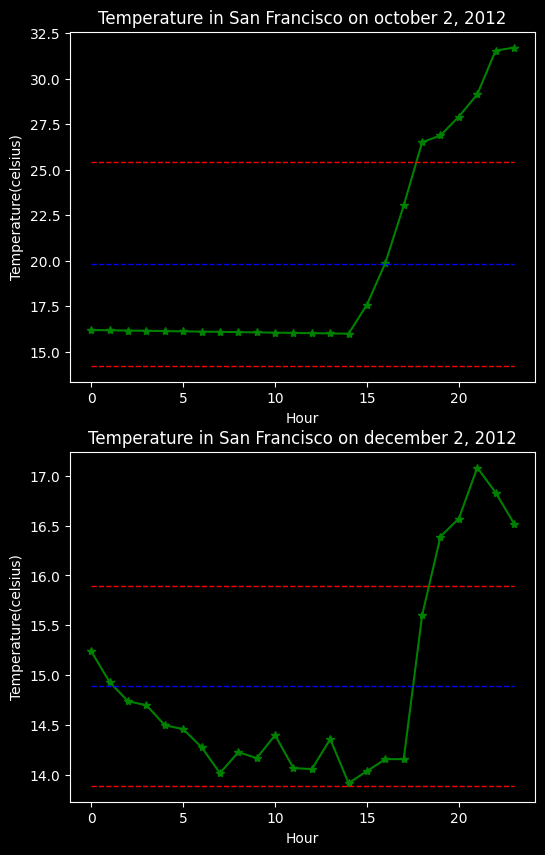

In [ ]:
# Temperature vector for San Francisco for 2012-10-02
t1 = df_temp.iloc[df_temp.index.get_loc('2012-10-02'), df_temp.columns.get_loc('San Francisco')].values
t1 = t1-273.15 # convert from kelvin to celsius
#print(t1)

# Temperature vector for San Francisco for 2012-12-02
t2 = df_temp.iloc[df_temp.index.get_loc('2012-12-02'), df_temp.columns.get_loc('San Francisco')].values
t2 = t2-273.15 #
#print(t2)

# Plot temperature vectors for both days
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (6, 10))
component_index = range(0, len(t1))


ax1.plot(component_index, t1, color = 'green', marker = '*')
ax1.plot(component_index, [np.mean(t1)] * len(t1), color = 'blue',
         linestyle = 'dashed', linewidth = 1)

ax1.plot(component_index, [np.mean(t1)-np.std(t1)] * len(t1), color = 'red',
         linestyle = 'dashed', linewidth = 1)
ax1.plot(component_index, [np.mean(t1)+np.std(t1)] * len(t1), color = 'red',
         linestyle = 'dashed', linewidth = 1)

ax1.set_xlabel('Hour')
ax1.set_ylabel('Temperature(celsius)')
ax1.set_title('Temperature in San Francisco on october 2, 2012')

ax2.plot(component_index, t2, color = 'green', marker = '*')
ax2.plot(component_index, [np.mean(t2)] * len(t2), color = 'blue',
         linestyle = 'dashed', linewidth = 1)

ax2.plot(component_index, [np.mean(t2)-np.std(t2)] * len(t2), color = 'red',
         linestyle = 'dashed', linewidth = 1)
ax2.plot(component_index, [np.mean(t2)+np.std(t2)] * len(t2), color = 'red',
         linestyle = 'dashed', linewidth = 1)
ax2.set_xlabel('Hour')
ax2.set_ylabel('Temperature(celsius)')
ax2.set_title('Temperature in San Francisco on december 2, 2012')




In [ ]:
# np.std(t2)
[100] * 5

[100, 100, 100, 100, 100]

---

Mean-center daily temperature vectors for San Francisco for October 2, 2012 and December 2, 2012 and make component plots of those vectors

---

[-3.62706017 -3.64143487 -3.65580958 -3.67018428 -3.68455898 -3.69893368
 -3.71330838 -3.72768308 -3.74205778 -3.75643248 -3.77080718 -3.78518188
 -3.79955658 -3.81393128 -3.82830598 -2.22830598  0.06169402  3.22169402
  6.70169402  7.07169402  8.11169402  9.33169402 11.74169402 11.90169402]
[ 0.34708333  0.03708333 -0.15291667 -0.19291667 -0.39291667 -0.43291667
 -0.61291667 -0.87291667 -0.66291667 -0.72291667 -0.49291667 -0.82291667
 -0.83291667 -0.53291667 -0.97291667 -0.85291667 -0.73291667 -0.73291667
  0.70708333  1.49708333  1.67708333  2.18708333  1.93708333  1.62708333]


Text(0.5, 1.0, 'Temperature in San Francisco on december 2, 2012')

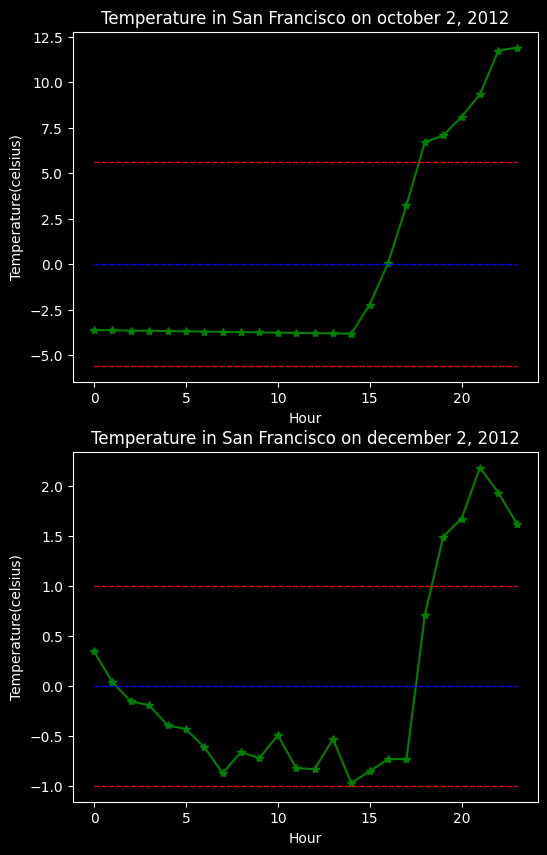

In [ ]:
# Mean-centered temperature vector for San Francisco for 2012-10-02
t1_mc = t1 - np.mean(t1)
print(t1_mc)

# Mean-centered temperature vector for San Francisco for 2012-12-02
t2_mc = t2 - np.mean(t2)
print(t2_mc)

# Plot mean-centered temperature vectors for both days
fig, (gx1, gx2) = plt.subplots(2, 1, figsize = (6, 10))
component_index = range(0, len(t1_mc))

gx1.plot(component_index, t1_mc, color = 'green', marker = '*')
gx1.plot(component_index, [np.mean(t1_mc)] * len(t1_mc),color = 'blue',
         linestyle = 'dashed', linewidth = 1)
gx1.plot(component_index, [np.mean(t1_mc)-np.std(t1_mc)] * len(t1_mc), color = 'red',
         linestyle = 'dashed', linewidth = 1)
gx1.plot(component_index, [np.mean(t1_mc)+np.std(t1_mc)] * len(t1_mc), color = 'red',
         linestyle = 'dashed', linewidth = 1)


gx1.set_xlabel('Hour')
gx1.set_ylabel('Temperature(celsius)')
gx1.set_title('Temperature in San Francisco on october 2, 2012')

gx2.plot(component_index, t2_mc, color = 'green', marker = '*')
gx2.plot(component_index, [np.mean(t2_mc)] * len(t2_mc), color = 'blue',
         linestyle = 'dashed', linewidth = 1)

gx2.plot(component_index, [np.mean(t2_mc)-np.std(t2_mc)] * len(t2), color = 'red',
         linestyle = 'dashed', linewidth = 1)
gx2.plot(component_index, [np.mean(t2_mc)+np.std(t2_mc)] * len(t2), color = 'red',
         linestyle = 'dashed', linewidth = 1)
gx2.set_xlabel('Hour')
gx2.set_ylabel('Temperature(celsius)')
gx2.set_title('Temperature in San Francisco on december 2, 2012')

---

Standardize daily temperature vectors for San Francisco for October 2, 2012 and December 2, 2012 and make component plots of those vectors

---

[-0.64832707 -0.65089651 -0.65346595 -0.65603539 -0.65860483 -0.66117427
 -0.6637437  -0.66631314 -0.66888258 -0.67145202 -0.67402146 -0.6765909
 -0.67916033 -0.68172977 -0.68429921 -0.39830359  0.01102764  0.57586898
  1.19790945  1.26404594  1.44994309  1.66801475  2.09879565  2.12739521]
[ 0.34703204  0.03707785 -0.15289407 -0.19288815 -0.39285859 -0.43285268
 -0.61282608 -0.87278765 -0.66281869 -0.72280982 -0.49284382 -0.82279504
 -0.83279356 -0.5328379  -0.97277287 -0.85279061 -0.73280834 -0.73280834
  0.70697883  1.49686207  1.67683547  2.18676009  1.93679704  1.62684286]


Text(0.5, 1.0, 'Temperature in San Francisco on december 2, 2012')

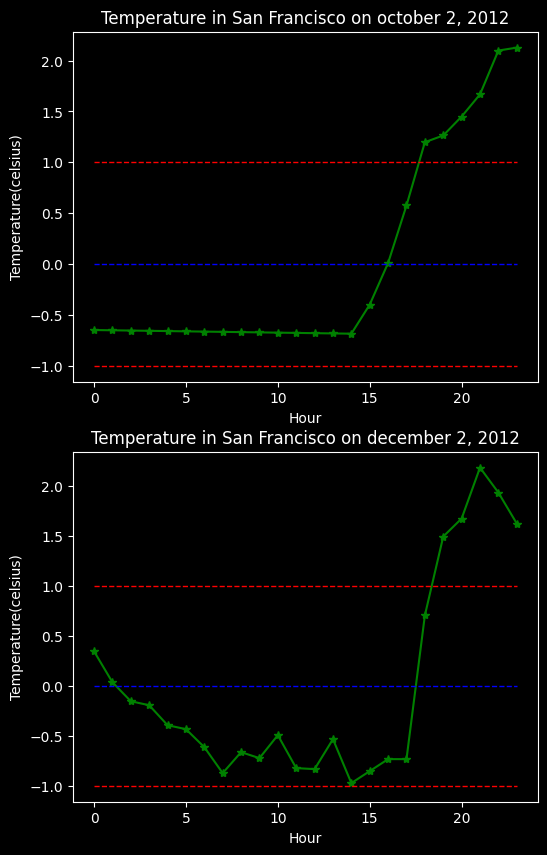

In [ ]:
# Standardized temperature vector for San Francisco for 2012-10-02
z1 = t1_mc / np.std(t1_mc)
print(z1)

# Mean-centered temperature vector for San Francisco for 2012-12-02
z2 = t2_mc / np.std(t2_mc)
print(z2)

# Plot standardized temperature vectors for both days
fig, (kx1, kx2) = plt.subplots(2, 1, figsize = (6, 10))
component_index = range(0, len(z1))

kx1.plot(component_index, z1, color = 'green', marker = '*')
kx1.plot(component_index, [np.mean(z1)] * len(z1), color = 'blue',
         linestyle = 'dashed', linewidth = 1)

kx1.plot(component_index, [np.mean(z1)-np.std(z1)] * len(t1), color = 'red',
         linestyle = 'dashed', linewidth = 1)
kx1.plot(component_index, [np.mean(z1)+np.std(z1)] * len(t1), color = 'red',
         linestyle = 'dashed', linewidth = 1)
kx1.set_xlabel('Hour')
kx1.set_ylabel('Temperature(celsius)')
kx1.set_title('Temperature in San Francisco on october 2, 2012')

kx2.plot(component_index, z2, color = 'green', marker = '*')
kx2.plot(component_index, [np.mean(z2)] * len(z2), color = 'blue',
         linestyle = 'dashed', linewidth = 1)

kx2.plot(component_index, [np.mean(z2)-np.std(z2)] * len(z2), color = 'red',
         linestyle = 'dashed', linewidth = 1)
kx2.plot(component_index, [np.mean(z2)+np.std(z2)] * len(z2), color = 'red',
         linestyle = 'dashed', linewidth = 1)
kx2.set_xlabel('Hour')
kx2.set_ylabel('Temperature(celsius)')
kx2.set_title('Temperature in San Francisco on december 2, 2012')


---

Identify outliers in the daily temperature vectors for San Francisco for October 2, 2012 and December 2, 2012

---

In [ ]:
# print(np.log(1.2)+np.log(0.75)) == (np.log(0.9))
# print(np.log(0.9))

# np.exp(-0.105)

-0.10536051565782631
-0.10536051565782628


0.9003245225862656

In [ ]:
threshold = 2.0
print(z1)
np.where(np.abs(z1) >= threshold)

[-0.64832707 -0.65089651 -0.65346595 -0.65603539 -0.65860483 -0.66117427
 -0.6637437  -0.66631314 -0.66888258 -0.67145202 -0.67402146 -0.6765909
 -0.67916033 -0.68172977 -0.68429921 -0.39830359  0.01102764  0.57586898
  1.19790945  1.26404594  1.44994309  1.66801475  2.09879565  2.12739521]


(array([22, 23]),)

In [ ]:
# Z-score threshold
threshold = 2.0 # number of std-deviation beyond which samples are outliers
print(f'On 2012-10-02, outliers hours were: {np.where(np.abs(z1) >= threshold)}')
print(f'On 2012-12-02, outliers hours were: {np.where(np.abs(z2) >= threshold)}')

On 2012-10-02, outliers hours were: (array([22, 23]),)
On 2012-12-02, outliers hours were: (array([21]),)


---

Download popular stock prices data from Yahoo Finance for the range August 1, 2024 to August 1, 2025

---

In [ ]:
# Download stock price data of popular companies
stocks = ['AAPL', 'MSFT', 'GOOG', 'TSLA', 'JNJ', 'JPM', 'NVDA', 'AMZN', 'META', 'XOM']
dfstock = yf.download(stocks, start = "2024-08-01", end = "2025-08-01")
dfstock = dfstock.xs('Close', axis = 1, level = 0) # xs Meaning cross sections
dfstock.dropna(inplace = True)
dfstock.head()

/tmp/ipython-input-3936038663.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  dfstock = yf.download(stocks, start = "2024-08-01", end = "2025-08-01")
[*********************100%***********************]  10 of 10 completed


Ticker,AAPL,AMZN,GOOG,JNJ,JPM,META,MSFT,NVDA,TSLA,XOM
Date,,,,,,,,,,
2024-08-01,217.097168,184.070007,171.626068,154.552948,203.392670,496.041473,413.256989,109.175514,216.860001,111.967545
2024-08-02,218.588501,167.899994,167.595413,157.802460,194.766373,486.474274,404.716644,107.236122,207.669998,111.900528
2024-08-05,208.059753,161.020004,159.872498,155.024048,190.619492,474.106628,391.499847,100.418274,198.880005,109.880409
2024-08-06,206.031509,161.929993,159.772964,152.832092,195.940002,492.403961,395.918671,104.217072,200.639999,109.296402
2024-08-07,208.606552,162.770004,159.981949,152.764771,195.998672,487.251587,394.749542,98.878769,191.759995,110.751648


In [ ]:
stocks = ['AAPL', 'MSFT', 'GOOG', 'TSLA', 'JNJ', 'JPM', 'NVDA', 'AMZN', 'META', 'XOM']
df_stocks = yf.download(stocks, start="2024-08-01", end="2025-08-01")
type(df_stocks)
df_stocks.columns.values

/tmp/ipython-input-3590028067.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_stocks = yf.download(stocks, start="2024-08-01", end="2025-08-01")
[*********************100%***********************]  10 of 10 completed


array([('Close', 'AAPL'), ('Close', 'AMZN'), ('Close', 'GOOG'),
       ('Close', 'JNJ'), ('Close', 'JPM'), ('Close', 'META'),
       ('Close', 'MSFT'), ('Close', 'NVDA'), ('Close', 'TSLA'),
       ('Close', 'XOM'), ('High', 'AAPL'), ('High', 'AMZN'),
       ('High', 'GOOG'), ('High', 'JNJ'), ('High', 'JPM'),
       ('High', 'META'), ('High', 'MSFT'), ('High', 'NVDA'),
       ('High', 'TSLA'), ('High', 'XOM'), ('Low', 'AAPL'),
       ('Low', 'AMZN'), ('Low', 'GOOG'), ('Low', 'JNJ'), ('Low', 'JPM'),
       ('Low', 'META'), ('Low', 'MSFT'), ('Low', 'NVDA'), ('Low', 'TSLA'),
       ('Low', 'XOM'), ('Open', 'AAPL'), ('Open', 'AMZN'),
       ('Open', 'GOOG'), ('Open', 'JNJ'), ('Open', 'JPM'),
       ('Open', 'META'), ('Open', 'MSFT'), ('Open', 'NVDA'),
       ('Open', 'TSLA'), ('Open', 'XOM'), ('Volume', 'AAPL'),
       ('Volume', 'AMZN'), ('Volume', 'GOOG'), ('Volume', 'JNJ'),
       ('Volume', 'JPM'), ('Volume', 'META'), ('Volume', 'MSFT'),
       ('Volume', 'NVDA'), ('Volume', 'TSLA'), ('

---

Compute daily log returns as $\log\left(\frac{P_t}{P_{t-1}}\right)$ where $P_t$ is stock price today and $P_{t-1}$ is stock price yesterday. For each company, its log return values can be treated as a vector.

In [ ]:
# Compute log returns
# log_returns = np.log(dfstock.iloc[-1,:] / dfstock.iloc[0,:])
# print(log_returns)
log_returns = np.log(dfstock / dfstock.shift(1)).dropna()

log_returns

Ticker,AAPL,AMZN,GOOG,JNJ,JPM,META,MSFT,NVDA,TSLA,XOM
Date,,,,,,,,,,
2024-08-02,0.006846,-0.091948,-0.023765,0.020807,-0.043338,-0.019476,-0.020882,-0.017924,-0.043302,-0.000599
2024-08-05,-0.049366,-0.041840,-0.047176,-0.017764,-0.021522,-0.025752,-0.033202,-0.065689,-0.043249,-0.018218
2024-08-06,-0.009796,0.005635,-0.000623,-0.014240,0.027529,0.037867,0.011224,0.037132,0.008811,-0.005329
2024-08-07,0.012421,0.005174,0.001307,-0.000441,0.000299,-0.010519,-0.002957,-0.052581,-0.045268,0.013227
2024-08-08,0.016496,0.018444,0.019040,0.008273,0.018099,0.041486,0.010635,0.059464,0.036256,0.018924
...,...,...,...,...,...,...,...,...,...,...
2025-07-25,0.000561,-0.003408,0.004545,-0.007459,0.006956,-0.002970,0.005524,-0.001382,0.034637,-0.003526
2025-07-28,0.000795,0.005816,-0.003406,-0.012436,-0.001139,0.006922,-0.002358,0.018559,0.029707,0.009376
2025-07-29,-0.013073,-0.007676,0.015442,0.011306,-0.004166,-0.024874,0.000137,-0.007040,-0.013575,0.012839


---

The risk or volatility associated with a stock can be quantified by the standard deviation of the log returns of that stock.

First, compute the volatility in the log return of TSLA. Then, compute the volatility in the log returns of the all the stocks and plot them in a bar plot in descending order.

---

In [ ]:
log_returns.std()

,0
Ticker,
AAPL,0.019815
AMZN,0.021501
GOOG,0.019647
JNJ,0.012190
JPM,0.017553
META,0.022929
MSFT,0.015702
NVDA,0.034123
TSLA,0.045008


In [ ]:
a_m = a - np.mean(a)
#print(a)
print(np.sqrt((np.dot(a_m, a_m)/len(a))))
print(np.std(a))

nan
nan


Volatility in the log returns of TSLA = 0.04500839002753893
Volatility in the log returns of all stocks =
 Ticker
TSLA    0.045008
NVDA    0.034123
META    0.022929
AMZN    0.021501
AAPL    0.019815
GOOG    0.019647
JPM     0.017553
MSFT    0.015702
XOM     0.015349
JNJ     0.012190
dtype: float64


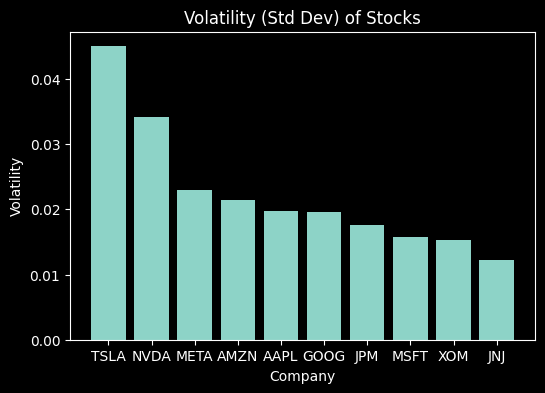

In [ ]:
# Compute standard deviation a.k.a. volatility a.k.a. risk of TSLA
#a = np.sum(np.log(dfstock['TSLA'] / dfstock['TSLA'].shift(1)))
a = log_returns
volatility_TSLA = a['TSLA'].std()
#print(a)
print(f'Volatility in the log returns of TSLA = {volatility_TSLA}')

# All stocks volatilities
volatilities = log_returns.std().sort_values(ascending = False)
print(f'Volatility in the log returns of all stocks =\n {volatilities}')

# Plot volatilities
fig, ax = plt.subplots(1, 1, figsize = (6, 4))
ax.bar(volatilities.index, volatilities.values)
ax.set_xlabel('Company')
ax.set_ylabel('Volatility')
ax.set_title('Volatility (Std Dev) of Stocks');
plt.show()

---

The covariance between two vectors is a measure of how the two vectors co-vary about their respective means. It is calculated as the average dot product of their mean-centered versions. If $\mathbf{a}_{mc}$ and $\mathbf{b}_{mc}$ represent the mean-centered versions of vectors $\mathbf{a}$ and $\mathbf{b},$ respectively, then the covariance between $\mathbf{a}$ and $\mathbf{b}$ is denoted and calculated as $$\text{cov}(\mathbf{a},\mathbf{b}) = \frac{1}{n}\times\left(\mathbf{a}_{mc}\cdot\mathbf{b}_{mc}\right).$$

In the component plot below of mean-centered heart rate and blood pressure values, it can be seen that the heart rates and blood pressures of the patients are covarying similarly; that is, as the heart rate increases or decreases w.r.t. the average heart rate from one patient to another, the blood pressure also typically does the same w.r.t the average blood pressure.

![Covariance](https://1drv.ms/i/c/37720f927b6ddc34/IQTLFeKh-TzhSpSSm3swzRsaAarPH-HPV-j9tmHPV7eiDuY?width=375&height=580)

Calculate the covariance between the log returns of AAPL and AMZN. Does it indicate that those stocks co-vary similarly?

Make component plots of the log returns of AAPL and AMZN. Do you see the stocks co-varying similarly?

Modify the component plots to show the mean-centered log returns. Now do you see the stocks co-varying similarly?



---

Covariance between AAPL and AMZN log returns = 0.0002456842292949601


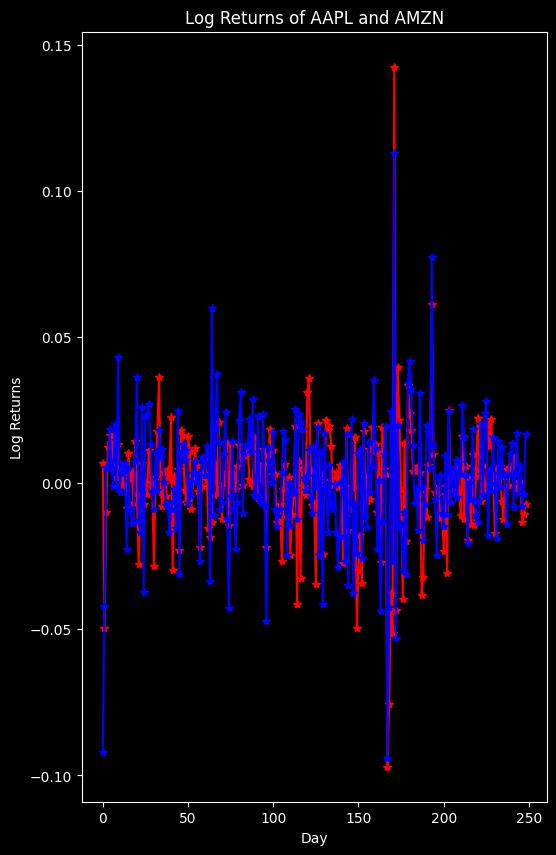

In [ ]:
# Covariance between log returns of APPL and AMZN
a = log_returns['AAPL'].values
a_mc = a-np.mean(a)
b = log_returns['AMZN'].values
b_mc = b-np.mean(b)
cov =np.dot(a_mc, b_mc)/len(a)
print(f'Covariance between AAPL and AMZN log returns = {cov}');

# Component plot of the log returns of AAPL and AMZN
fig, ax = plt.subplots(1, 1, figsize = (6, 10))
component_index = range(0, len(log_returns))
ax.plot(component_index, a, color = 'red', marker = '*')
ax.plot(component_index, b, color = 'blue', marker = '*')
ax.set_xlabel('Day')
ax.set_ylabel('Log Returns')
ax.set_title( 'Log Returns of AAPL and AMZN');

---

Compute the covariance between all pairs of log returns. The resulting matrix, denoted as $\pmb{\Sigma}$ is called the covariance matrix.

From that matrix, are you able to identify stocks that co-vary?

---

In [ ]:
# Covariance matrix matrix of log returns
covmatrix = log_returns.cov() # applying cov function to the log returns
print(covmatrix)

Ticker      AAPL      AMZN      GOOG       JNJ       JPM      META      MSFT  \
Ticker                                                                         
AAPL    0.000393  0.000247  0.000193  0.000021  0.000164  0.000250  0.000175   
AMZN    0.000247  0.000462  0.000272 -0.000039  0.000211  0.000364  0.000242   
GOOG    0.000193  0.000272  0.000386 -0.000032  0.000140  0.000242  0.000167   
JNJ     0.000021 -0.000039 -0.000032  0.000149  0.000019 -0.000047 -0.000027   
JPM     0.000164  0.000211  0.000140  0.000019  0.000308  0.000188  0.000123   
META    0.000250  0.000364  0.000242 -0.000047  0.000188  0.000526  0.000244   
MSFT    0.000175  0.000242  0.000167 -0.000027  0.000123  0.000244  0.000247   
NVDA    0.000299  0.000426  0.000340 -0.000108  0.000249  0.000439  0.000335   
TSLA    0.000428  0.000514  0.000464 -0.000030  0.000364  0.000498  0.000328   
XOM     0.000122  0.000077  0.000058  0.000039  0.000106  0.000080  0.000035   

Ticker      NVDA      TSLA       XOM  


---

The correlation coefficient between two vectors $\mathbf{a}$ and $\mathbf{c}$ is a normalized measure (between -1 and 1) of their covariance which is denoted and calculated as $$\text{cor}(\mathbf{a},\mathbf{b}) = \frac{\left(\mathbf{a}_{mc}\cdot\mathbf{b}_{mc}\right)}{\lVert \mathbf{a}_{mc}\rVert_2\lVert\mathbf{b}_{mc}\rVert_2}.$$ Note that the cauchy-Schwarz inequality guarantees that the above quantity is between -1 and 1.

If the correlation coefficient is close to 1, then as one vector's components increase, the other vectors components also increase typically along a straight line. If the correlation coefficient is close to -1, then as one vector's components increase, the other vectors components decrease typically along a straight line.

Compute the correlation coefficient between the log returns of AAPL and AMZN. Does it indicate that those stocks co-vary similarly?

Make a scatter plot of the log returns of AAPL and AMZN. Does the plot indicate that the two stocks co-vary similarly?

---

Correation coefficient between AAPL and AMZN log returns = [[1.         0.57899407]
 [0.57899407 1.        ]]


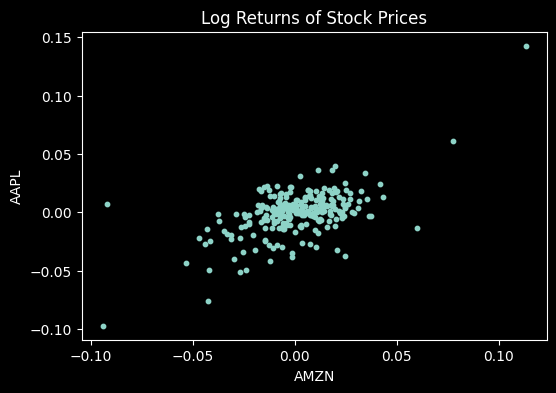

In [ ]:
# Correlation between APPL and AMZN)
corr = np.corrcoef(a, b)
print(f'Correation coefficient between AAPL and AMZN log returns = {corr}')

# Scatter plot of the log returns of AAPL and AMZN
fig, ax = plt.subplots(1, 1, figsize = (6, 4))
ax.scatter(log_returns['AMZN'], log_returns['AAPL'], s = 10)
ax.set_xlabel('AMZN')
ax.set_ylabel('AAPL')
ax.set_title('Log Returns of Stock Prices');

---

Compute the correlation coefficient between all pairs of log returns and visualize the resulting correlation matrix. From that, identify stocks that co-vary typically.

---

Ticker      AAPL      AMZN      GOOG       JNJ       JPM      META      MSFT  \
Ticker                                                                         
AAPL    1.000000  0.578994  0.495729  0.085638  0.470447  0.550175  0.563963   
AMZN    0.578994  1.000000  0.644258 -0.150146  0.557740  0.737865  0.715403   
GOOG    0.495729  0.644258  1.000000 -0.132492  0.405254  0.537130  0.540948   
JNJ     0.085638 -0.150146 -0.132492  1.000000  0.086823 -0.167628 -0.143414   
JPM     0.470447  0.557740  0.405254  0.086823  1.000000  0.467597  0.447861   
META    0.550175  0.737865  0.537130 -0.167628  0.467597  1.000000  0.678692   
MSFT    0.563963  0.715403  0.540948 -0.143414  0.447861  0.678692  1.000000   
NVDA    0.442177  0.580955  0.506882 -0.259723  0.415699  0.561024  0.624664   
TSLA    0.479896  0.530854  0.525204 -0.055566  0.460606  0.482292  0.464444   
XOM     0.402426  0.233551  0.191923  0.210414  0.394069  0.226467  0.145205   

Ticker      NVDA      TSLA       XOM  


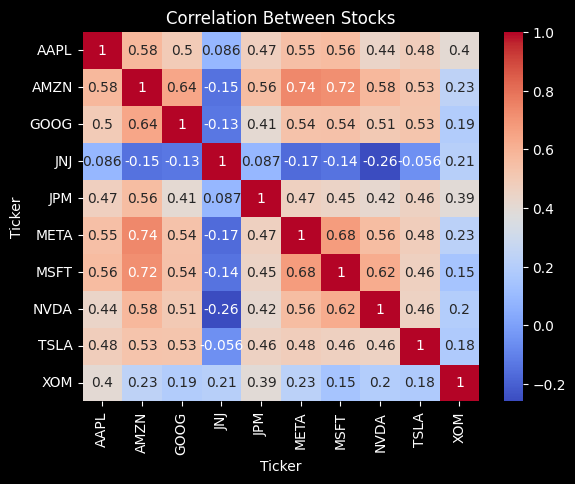

In [ ]:
# Correlation matrix of log returns
corrmatrix = log_returns.corr()
print(corrmatrix)
sns.heatmap(corrmatrix, cmap= 'coolwarm', annot = True);
plt.title("Correlation Between Stocks")
plt.show()

---

The average log return (or simply return) associated with a stock (AAPL) is simply the average or mean of the log returns of the that stock. For example, if we denote the log returns of AAPL as an $n$-vector $\mathbf{a},$ then its average log return in pen & paper can be written as $$\frac{1}{n}\times\left(a_1+a_2+\cdots+a_n\right) = \frac{1}{n}\times\left(\pmb{1}\cdot\mathbf{a}\right),$$ where $\pmb{1}$ is an $n$-vector whose elements are all equal to ones.

For a blended investment on the 10 stocks (called a portfolio) with weights that add up to 1 and represented as the vector $$\mathbf{w}=\begin{bmatrix}w_1\\w_2\\w_3\\\vdots\\w_{10}\end{bmatrix},$$
- the averate return can be shown to be $\mathbf{w}\cdot\mathbf{r},$ where $\mathbf{r}$ is the vector of average returns of all the 10 stocks;
- the overall risk (or simply risk) in the portfolio is $\mathbf{w}\cdot\left(\pmb{\Sigma}\mathbf{w}\right),$ which takes into account the individual volatility of each stock and their co-movement w.r.t. the other stocks.

Try to come up with a portfolio (that is, values for the components of the weights vector $\mathbf{w})$ that results in the best return-to-risk ratio. The best return-to-risk ratio is also referred to as the sharpe ratio.

---

In [ ]:
# Optimizing portfolio
print(0.5*np.mean(log_returns['AAPL'])+ 0.5*np.std(log_returns['AMZN']))
print(np.std(log_returns['AAPL']))

-0.0001847816420391947
0.01977480550598662


In [ ]:
weights=np.array([0.000,0.000,0.000,0.397,0.278,0.254,0.041,0.045,0.000,0.00])
r= log_returns.mean().values
port_return = np.dot(weights, r)
print("return",port_return)
S=log_returns.cov()
port_risk = np.dot(weights, np.dot(S, weights))
print("risk",port_risk)
sharpe_ratio = port_return / port_risk
print("sharpe_ratio",sharpe_ratio)

return 0.0010930378564213887
risk 0.00012580191990448831
sharpe_ratio 8.688562601041765


In [ ]:
log_returns.mean().values  # all the col in one shot

array([-1.84781642e-04,  9.65762784e-04,  4.68459649e-04,  2.26981896e-04,
        1.51016650e-03,  1.78388981e-03,  1.01906353e-03,  1.96022534e-03,
        1.41254618e-03, -4.89638131e-05])

In [ ]:
np.array(log_returns.cov().values)

In [ ]:
 # Expected portfolio returns vector r
r = torch.tensor(log_returns.mean().values, dtype=torch.float64)

# Initial portfolio weieghts vector
w = torch.tensor(0.1* np.ones(10), dtype= torch.float64, requires_grad= True)

# print(type(r))
# print(type(w))

# covarience matrix of risks
S = torch.tensor(np.array(log_returns.cov()), dtype= torch.float64)


# Define optimizer
optimizer = torch.optim.Adam([w], lr = 1e-02)

# loss function
def loss_fn(w):
  loss = -torch.dot(w,r) / torch.dot(w, torch.matmul(S, w))
  return loss

# Optimization loop
num_epochs = 10000 # epochs is number of iterations
for epoch in range(num_epochs):
# zero out the gradients
  optimizer.zero_grad()

  # loss calculations
  w_constrained = torch.softmax(w, dim=0) # constraints satisfaction happens
  loss = loss_fn(w_constrained)

  # backpropagatio and optimization
  loss.backward()
  optimizer.step()

  # print the loss of every 1000 epochs
  if epoch%1000 == 0:
    print(f'Epoch {epoch}, loss= {loss.item()}')

# print the optmized portfolio weights vector
print(w)
#print(sum(w))








Epoch 0, loss= -3.778577546365207
Epoch 1000, loss= -9.524343064798517
Epoch 2000, loss= -9.554888365435964
Epoch 3000, loss= -9.562092353426593
Epoch 4000, loss= -9.564881119941173
Epoch 5000, loss= -9.566205123978813
Epoch 6000, loss= -9.566902819195493
Epoch 7000, loss= -9.56729241829433
Epoch 8000, loss= -9.567517385017972
Epoch 9000, loss= -9.56764987822495
tensor([-6.5049, -6.4688, -5.8992,  5.7679,  4.9808,  4.4311,  4.9489,  2.7875,
        -6.1054, -6.5955], dtype=torch.float64, requires_grad=True)


In [ ]:
# print(w)
# print(torch.softmax(w, dim=0))

# Optimal Sharp ratio
w = torch.softmax(w, dim=0)
average_return = torch.dot(w, r)
overall_risk = torch.dot(w, torch.matmul(S, w))
sharpe_ratio = average_return / overall_risk
print(f'Optimal Sharpe Ratio = {sharpe_ratio}')

Optimal Sharpe Ratio = 9.5677273300984


In [ ]:
w

tensor([2.1168e-06, 2.1946e-06, 3.8794e-06, 4.5257e-01, 2.0600e-01, 1.1889e-01,
        1.9954e-01, 2.2979e-02, 3.1564e-06, 1.9336e-06], dtype=torch.float64,
       grad_fn=<SoftmaxBackward0>)

In [ ]:
X = np.array([[76, 126, 38], [74, 120, 38], [72, 118, 37.5], [78, 136, 37.0]])
print(X)  # Matrix representing patient data (rows = patients, columns = features)

v = np.array([1, 1, 1])
print(v)  # Initial direction vector

v = v / np.linalg.norm(v)
print(v)  # Unit direction vector (normalized to length 1)

print(np.dot(X, v))  # Scalar projections of all patients onto the direction vector

mu = np.mean(X, axis=0)
print(mu)  # Mean vector representing the average patient

print(np.dot(mu, v))  # Projection of the average patient onto the direction vector

print(np.mean(np.dot(X, v)))  # Another way to compute the projection of the average patient (using mean of projections)

print(np.var(np.dot(X, v)))  # Variance of the patients' projections on the direction vector

print(np.mean(np.square(np.dot(X, v) - np.mean(np.dot(X, v)))))
# Variance calculated by subtracting the mean of scalar projections and squaring

print(np.mean(np.square(np.dot(X, v) - np.dot(mu, v))))
# Variance calculated by subtracting the projection of the average patient and squaring


[[ 76.  126.   38. ]
 [ 74.  120.   38. ]
 [ 72.  118.   37.5]
 [ 78.  136.   37. ]]
[1 1 1]
[0.57735027 0.57735027 0.57735027]
[138.56406461 133.94526245 131.34718624 144.91491757]
[ 75.    125.     37.625]
137.19285771618485
137.19285771618485
26.55729166666677
26.55729166666677
26.55729166666677
